# OpenAlex Demonstration
## Eric Schares
---
### I wanted to see if I could get OpenAlex to respond to a query

In [38]:
import pandas as pd
import numpy as np
import requests    # module for executing API calls

# Build filters

In [39]:
# I took this from OpenAlex's https://github.com/ourresearch/openalex-api-tutorials/blob/develop/notebooks/institutions/oa-percentage.ipynb

filter_by_institution_id = 'institutions.ror:https://ror.org/04rswrd78'   # using Iowa State's ROR ID, find yours at ror.org. This means at least one author is from ISU
filter_by_paratext = 'is_paratext:false'                                  # is not part of the front matter - cover, ToC, issue information, etc
filter_by_type = 'type:journal-article'   
filter_by_publication_date = 'from_publication_date:2022-01-01'
my_email = 'mailto=you@email.com'    #change to your own email, including this puts you in OpenAlex's "polite pool" to get faster responses, https://docs.openalex.org/api#the-polite-pool

In [40]:
# combine all the filters

all_filters = (filter_by_institution_id, filter_by_paratext, filter_by_type, filter_by_publication_date)
filter_param = f'filter={",".join(all_filters)}'
filter_param = filter_param + '&' + my_email
print(f'filter query parameter:\n  {filter_param}')

filter query parameter:
  filter=institutions.ror:https://ror.org/04rswrd78,is_paratext:false,type:journal-article,from_publication_date:2022-01-01&mailto=eschares@iastate.edu


In [41]:
# put the URL together
filtered_works_url = f'https://api.openalex.org/works?{filter_param}'
print(f'complete URL:\n  {filtered_works_url}')

complete URL:
  https://api.openalex.org/works?filter=institutions.ror:https://ror.org/04rswrd78,is_paratext:false,type:journal-article,from_publication_date:2022-01-01&mailto=eschares@iastate.edu


## Now we have a complete API URL. You could even click it and see the API response in your browser
---
#### Next we use the `requests` module to send that URL to OpenAlex

In [42]:
api_response = requests.get(filtered_works_url)
api_response

<Response [200]>

#### Response [200] means it succeeded. But I don't see any data
#### Data is delivered in the response in JSON format, so run .json() on it

In [43]:
parsed_response = api_response.json()
#parsed_response   # uncomment to see the full (long) data

___
#### Now our data is in the `parsed_response` variable, which is a dictionary

In [44]:
type(parsed_response)

dict

#### Access data using the square bracket notation `[]`

In [45]:
# Title of the first returned article (remember Python starts at 0)
parsed_response['results'][0]['title']

'MATURE-Food: Food Recommender System for MAndatory FeaTURE Choices A system for enabling Digital Health'

In [46]:
# Pub year of the first article
parsed_response['results'][0]['publication_year']

2022

In [47]:
# Title of the second returned article
parsed_response['results'][1]['title']

'How arsenic makes amorphous GeSe a robust chalcogenide glass for advanced memory integration'

#### Screenshot of the API response (the `parsed_response` variable in our case). Note how we go into 'results', then the first record, then 'title'

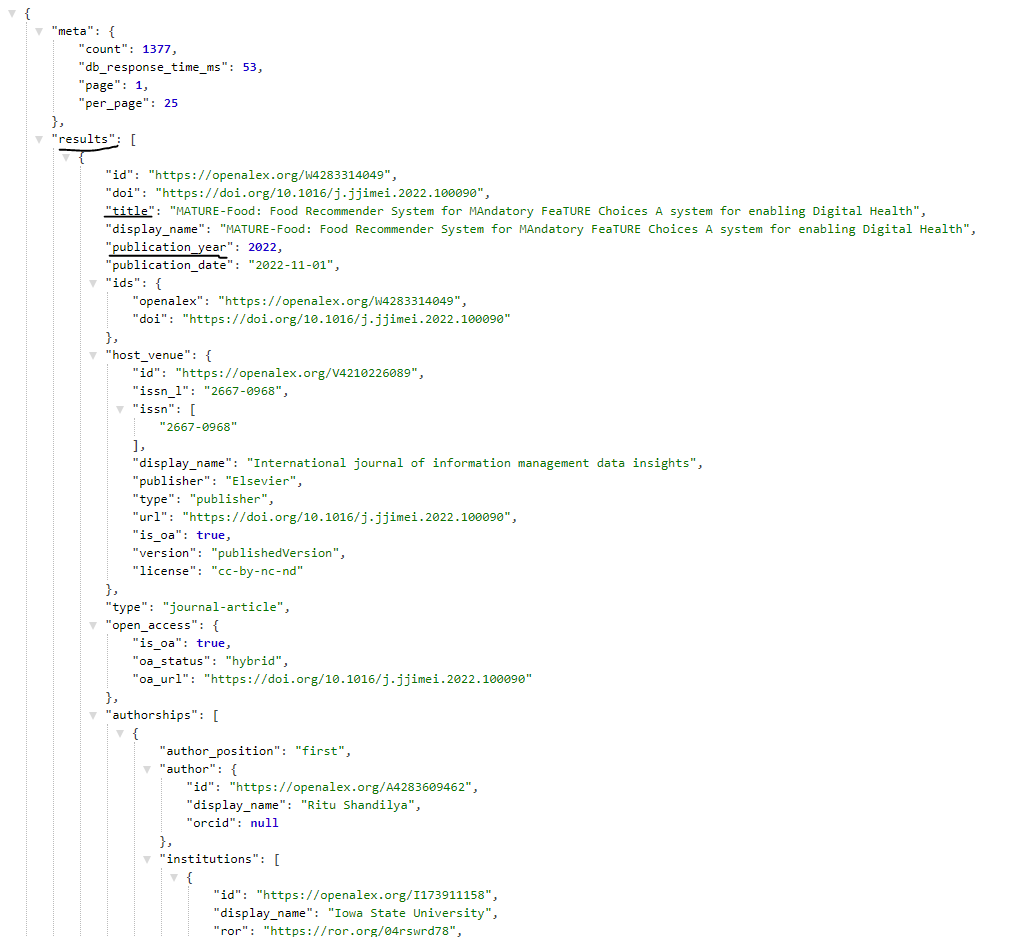

### Note: This only gives us the first 25 results. I haven't figured out how to do pagination yet

---
### So now I can pull all kinds of data and answer questions.
### For example, I want to look at a publication's references. What years were *those* papers published?

In [48]:
parsed_response['results'][1]['referenced_works']

['https://openalex.org/W1537479324',
 'https://openalex.org/W1953238867',
 'https://openalex.org/W1969477139',
 'https://openalex.org/W1970127494',
 'https://openalex.org/W1976761365',
 'https://openalex.org/W1980333083',
 'https://openalex.org/W1981368803',
 'https://openalex.org/W2002761831',
 'https://openalex.org/W2020195823',
 'https://openalex.org/W2020681192',
 'https://openalex.org/W2032019017',
 'https://openalex.org/W2042862454',
 'https://openalex.org/W2045741123',
 'https://openalex.org/W2051220390',
 'https://openalex.org/W2055794073',
 'https://openalex.org/W2069394095',
 'https://openalex.org/W2074856613',
 'https://openalex.org/W2078260102',
 'https://openalex.org/W2079105963',
 'https://openalex.org/W2081477542',
 'https://openalex.org/W2083222334',
 'https://openalex.org/W2088043604',
 'https://openalex.org/W2090748025',
 'https://openalex.org/W2165805241',
 'https://openalex.org/W2508892146',
 'https://openalex.org/W2745070442',
 'https://openalex.org/W2745115749',
 

In [49]:
years = []
for i in parsed_response['results'][1]['referenced_works']:   # for each of those works
    splat = i.split('/')  # split by / to isolate the work code
    entity = splat[3]     #W1537479324
    
    single_work = requests.get('https://api.openalex.org/works/'+entity)   #do another API call just like we did above. Firs requests.get
    parsed_single_work = single_work.json()   #then parse the response with .json()
    
    print(parsed_single_work['publication_year'])   #print out the year
    years.append(parsed_single_work['publication_year'])  #save the year to a list
    

2001
2015
2010
1994
2008
2012
1996
2007
1983
2004
1976
2007
1976
1968
2010
2007
2004
2010
1993
2010
1996
1993
2010
2007
2016
2017
2017
2017
2017
2017
2018
2018
2018
2018
2018
2019
2018
2019
2018
2019
2019
2019
2019
2019
2020
2020
2020
2020
2010
2007
2021
2021
2021
2021


In [50]:
min_year = np.min(years)
min_year

1968

In [51]:
max_year = np.max(years)
max_year

2021

(array([ 1.,  2.,  1.,  0.,  3.,  2.,  3., 12.,  2., 28.]),
 array([1968. , 1973.3, 1978.6, 1983.9, 1989.2, 1994.5, 1999.8, 2005.1,
        2010.4, 2015.7, 2021. ]),
 <BarContainer object of 10 artists>)

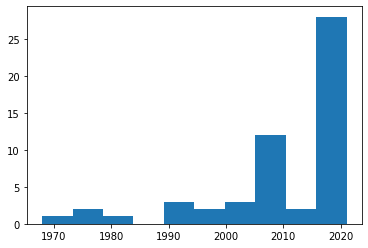

In [52]:
# plot those years

from matplotlib import pyplot as plt
plt.hist(years)